

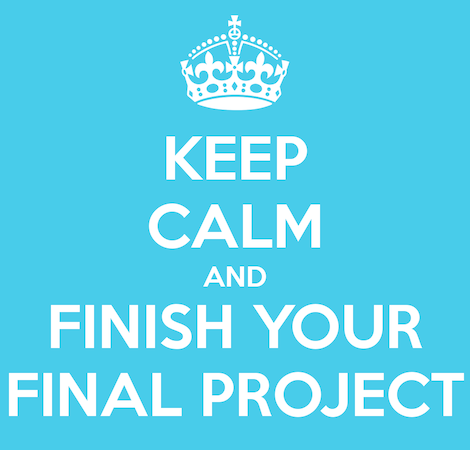

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [1]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [2]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app

{'title': 'DateCamera2 (Auto timestamp)',
 'icon': 'https://lh3.googleusercontent.com/BvVD8_9aN_-wrqP7WTeF4u40MocWdbNoxxlU_HR1GnRT9SGxZmV3JEQbjCaRVj5880e3',
 'screenshots': ['https://lh3.googleusercontent.com/_CJBocPzM9CF2CPrnnvbEX5-9NllpY2AsqB9e8hyoDDwUIC_dv95Q7dehq8Tu7KKX1c=w720-h310-rw',
  'https://lh3.googleusercontent.com/zQUynoLG5VJd2dV4leUNCvqehyDMVbBVEiqWdKpL35CqkbxDsatCeGOuEviAGTEvHMI=w720-h310-rw',
  'https://lh3.googleusercontent.com/u7Yg9yiCLx9Jou2CqfUr0I1w1I08km_n0I-VCC7Tc8IE-lmqUtHfCemPChNnaO5n6dk=w720-h310-rw',
  'https://lh3.googleusercontent.com/KPcyVSjtX3dvVy8WP2G67U8G8xK2IQHhqWa0nnlPevCr-BaQm31t46StfEs96UTFtZBt=w720-h310-rw',
  'https://lh3.googleusercontent.com/dgUVp1C2nbIcj5XOKLGidzPkvBmWKwXzCxwuHwhhMkn7s8rve6gF-NkTHuuInr0GBA=w720-h310-rw',
  'https://lh3.googleusercontent.com/M0YDP301kQu6WsQxt9fZfsxGRumFrWZnTyPGNlcjeWDbLufl5CC4vDm1Z5F9SUiCR8I=w720-h310-rw',
  'https://lh3.googleusercontent.com/nWRsvYhsHsdmP3W7YC9L9J-vA8prbPIbWVi7mERMU_0jzI_92lU7mYd6gCajORcHBw=w720

# Above this is the original execersie 
# Below this line is my code

## REASONINING AND METRICS

The goal of the project is to identify as many clicking user as possible.
I don't care to classify a non-clicking user as a clicker as long as the classification precision 
of non-clickers is above 90%. This would mean that I would still predict many non-clickers 
as clickers but I will not miss many clickers and I will ignore the majority of the non-clickers

### Metrics:

Recall / Sensitivity - The project tries to get a larege recall value for clickers
We don't care about the recall of non-clickers

Precision / Specifity - We would like to have good precision of above 90% for the non-clicker
We don't care about the precision of the non-clicker

F1 - F1 score would be low for this project because we don't care about bad precision for clickers
and bad recall for non-clickers 


ROC Curve is not helpful when we except many false positives and don't care about them

### Short  summary of the results

Best results were for gradient boost which the recal was 95% for clickers and precision 96% for non-clicker

### Import Section

In [3]:
import eli5
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from zipfile import ZipFile
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import random
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint 
from sklearn.ensemble import GradientBoostingClassifier
pd.set_option('display.max_columns', None)

2022-05-30 13:02:55.829827: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 13:02:55.829924: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Before any other work I convert the UTC time in the table to local time according to USA state
### I didn't add minute or second because I think this will not improve the results

In [4]:
utc_dict = {
 'AK': -9,
 'AL': -6,
 'AZ': -7,
 'AR': -6,
 'CA': -8,
 'CO': -7,
 'CT': -5,
 'DE': -5,
 'DC': -5,
 'FL': -5,
 'GA': -5,
 'HI': 0,
 'ID': -7,
 'IL': -6,
 'IN': -5,
 'IA': -6,
 'KS': -6,
 'KY': -5,
 'LA': -6,
 'ME': -5,
 'MD': -5,
 'MA': -5,
 'MI': -5,
 'MN': -6,
 'MS': -6,
 'MO': -6,
 'MT': -7,
 'NE': -6,
 'NV': -8,
 'NH': -5,
 'NJ': -5,
 'NM': -7,
 'NY': -5,
 'NC': -5,
 'ND': -6,
 'OH': -5,
 'OK': -6,
 'OR': -8,
 'PA': -5,
 'RI': -5,
 'SC': -5,
 'SD': -6,
 'TN': -6,
 'TX': -6,
 'UT': -7,
 'VT': -5,
 'VA': -5,
 'WA': -8,
 'WV': -5,
 'WI': -6,
 'WY': -7}

In [5]:
data['user_state'] = data['user_state'].astype('string')

In [6]:
data['utc_hour_offset'] = data['user_state'].apply(lambda x : utc_dict[x]) 

In [7]:
data['hour'] = data['utc_time'].apply(lambda x : pd.Timestamp.utcfromtimestamp(x / 1000).hour)

/tmp/ipykernel_20203/2797534280.py:1: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  data['hour'] = data['utc_time'].apply(lambda x : pd.Timestamp.utcfromtimestamp(x / 1000).hour)


In [8]:
data['hour_local']  = (data['hour']  + data['utc_hour_offset'] + 24) % 24

In [9]:
# data[['utc_time', 'user_state', 'hour_local']].sample(10) # For testing

In [10]:
data.drop(['hour'], axis=1, inplace=True) # drop temp column

In [11]:
data.drop(['utc_hour_offset'], axis=1, inplace=True) # drop temp column

### Here I try to understand what type of data is in the table and how much of the data is relevant

In [12]:
data.describe()

,utc_time,device_height,device_width,click,hour_local
count,3.148828e+06,3.148828e+06,3.148828e+06,3.148828e+06,3.148828e+06
mean,1.538334e+12,1.180970e+03,1.152078e+03,6.770741e-02,1.275634e+01
std,2.320255e+09,5.190901e+02,4.526602e+02,2.512432e-01,6.223482e+00
min,1.533578e+12,1.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
25%,1.536460e+12,7.200000e+02,7.200000e+02,0.000000e+00,8.000000e+00
50%,1.538472e+12,1.080000e+03,1.080000e+03,0.000000e+00,1.300000e+01
75%,1.540095e+12,1.280000e+03,1.280000e+03,0.000000e+00,1.700000e+01
max,1.542630e+12,3.120000e+03,3.120000e+03,1.000000e+00,2.300000e+01


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     string
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  marketplace    object
 11  click          int64 
 12  hour_local     int64 
dtypes: int64(5), object(7), string(1)
memory usage: 312.3+ MB


In [14]:
data.isna().sum() 

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             39
device_maker     964004
device_model     963858
device_osv            0
device_height         0
device_width          0
marketplace           0
click                 0
hour_local            0
dtype: int64

In [15]:
data.isna().sum() / len(data.index)

bidid            0.000000
utc_time         0.000000
app_id           0.000000
user_state       0.000000
user_isp         0.000012
device_maker     0.306147
device_model     0.306101
device_osv       0.000000
device_height    0.000000
device_width     0.000000
marketplace      0.000000
click            0.000000
hour_local       0.000000
dtype: float64

### It seems that device_maker and device_mode have a lot of missing values ~30% of the values are NA.
### I will fill this with a string categorial value of unknown.
 

In [16]:
data['device_maker'].fillna('unknown', inplace=True)
data['device_model'].fillna('unknown', inplace=True)

### user_isp has 39 missing values and  I will replace them with unknown too.

In [17]:
data['user_isp'].fillna('unknown', inplace=True)

### Now there are no missing values. BAM

In [18]:
data.isna().sum().sum()

0

### There are columns which contains a large number of categorial values
### In this section I group these categories to a bucket of one value
### in order to reduce the dummies number

### Group rare device models:

In [19]:
data.loc[data['device_model'].value_counts()[data['device_model']].values < 12000, 'device_model'] = "rare_model"

In [20]:
len(data['device_model'].unique())

42

### Group rare device makers

In [21]:
data.loc[data['device_maker'].value_counts()[data['device_maker']].values < 1000, 'device_maker'] = "rare_maker"

In [22]:
len(data['device_maker'].unique())

26

### Group rare user_isp

In [23]:
data.loc[data['user_isp'].value_counts()[data['user_isp']].values < 5000, 'user_isp'] = "rare_user_isp"

In [24]:
len(data['user_isp'].unique())

27

### bidid column:

In [25]:
len(data['bidid'].unique())

2936921

### It seems that there are some repititions of the bid id.
### However most of this data is unique and doesn't seem to have a pattern
### This is why I dropped this column

In [26]:
data.drop(['bidid'], axis=1, inplace=True)

#### Trying to understand which columns we can eliminate categorial values

In [27]:
data.nunique()

utc_time         3147513
app_id             14869
user_state            51
user_isp              27
device_maker          26
device_model          42
device_osv            20
device_height        308
device_width         248
marketplace            1
click                  2
hour_local            24
dtype: int64

### The are 14869 different app_id. It is not feasible to use the get_dummies function
### to replace them. I will drop this column after I use it in order to join the data 
### from the play_app.zip file

### marketplace seems to have only one value. It doesn't give us additional info
### I will remove it from the data set

In [28]:
data.drop(['marketplace'], axis=1, inplace=True)

### Adding data from the 2nd source (play_app.zip)
### I dropped most of the columns with "heavy" text but retained
### content_rating which has some text

In [29]:
output = pd.DataFrame()

cols = ['app_id', 'category', 'score', 'reviews', 'bids', 'editors_choice', 'price', 'iap', 'developer_id', 'installs','content_rating', 'free']

with ZipFile('data/play_apps.zip', 'r') as zipObj:
    # Get list of files names in zip
    listOfiles = zipObj.namelist()
    # Iterate over the list of file names in given list
    for elem in listOfiles:
        app = pickle.loads(zipObj.read(elem))       
        additional_data = dict(map(lambda x: (x, [app[x]]), cols))
        df = pd.DataFrame(data=additional_data)
        output = pd.concat([output, df], ignore_index=True)


In [30]:
output2 = data.set_index('app_id').join(output.set_index('app_id'))

### Now I need to remove the NA from the "new" data imported from the play files

In [31]:
output2.isna().sum() 

utc_time               0
user_state             0
user_isp               0
device_maker           0
device_model           0
device_osv             0
device_height          0
device_width           0
click                  0
hour_local             0
category          302161
score             307432
reviews           302161
bids              302161
editors_choice    302161
price             303212
iap               302161
developer_id      302161
installs          302161
content_rating    302161
free              302161
dtype: int64

In [32]:
output2.isna().sum() / len(output2.index)

utc_time          0.000000
user_state        0.000000
user_isp          0.000000
device_maker      0.000000
device_model      0.000000
device_osv        0.000000
device_height     0.000000
device_width      0.000000
click             0.000000
hour_local        0.000000
category          0.095960
score             0.097634
reviews           0.095960
bids              0.095960
editors_choice    0.095960
price             0.096294
iap               0.095960
developer_id      0.095960
installs          0.095960
content_rating    0.095960
free              0.095960
dtype: float64

### about 9% of the data is nulls. This time I will remove it

In [33]:
len_orig = len(output2)

print('Dataset before:', len_orig)
output2.dropna(how='any', inplace=True)
print('Dataset after:', len(output2))
print('Remaining data %:',  100 * len(output2) / len_orig)

Dataset before: 3148828
Dataset after: 2840345
Remaining data %: 90.2032438735936


In [34]:
output2.isna().sum().sum()

0

### Change the type of boolean  columns to int

In [35]:
output2['free'] = output2['free'].astype(int)
output2['iap'] = output2['iap'].astype(int)
output2['editors_choice'] = output2['editors_choice'].astype(int)

### Also I want to replace the width height columnns with area column



In [36]:
output2['device_area'] = output2['device_height'] *  output2['device_width']
output2.drop(['device_height'], axis=1, inplace=True)
output2.drop(['device_width'], axis=1, inplace=True)

### Replace the price string with numbers with the same meaning 

In [37]:
output2['price'].unique()

array(['0', '$0.99', '$1.99'], dtype=object)

In [38]:
output2['price'].replace('$0.99', '0.99', inplace=True)
output2['price'].replace('$1.99', '1.99', inplace=True)
output2['price'] = output2['price'].astype('float')



### Content rating : Here I tried to seperate the content to more clear categories
### Maybe this is unnecessary, but my intuition is that this will bring better results

In [39]:
output2.head()

,utc_time,user_state,user_isp,device_maker,device_model,device_osv,click,hour_local,category,score,reviews,bids,editors_choice,price,iap,developer_id,installs,content_rating,free,device_area
app_id,,,,,,,,,,,,,,,,,,,,
Ibtikar.Applications.Ibaloot,1539532931214,DC,T-Mobile USA,Samsung,SM-G955U,8.0.0,0,11,[GAME_CARD],4.0,53660.0,103.0,0,0.0,1,"Ibtikar+Technologies,+Co.","1,000,000+",[Everyone],1,1534464
Ibtikar.Applications.Ibaloot,1537448465440,MN,rare_user_isp,Samsung,rare_model,7.0,0,7,[GAME_CARD],4.0,53660.0,103.0,0,0.0,1,"Ibtikar+Technologies,+Co.","1,000,000+",[Everyone],1,1016064
Ibtikar.Applications.Ibaloot,1534482812953,MD,AT&T Wireless,unknown,unknown,8.0.0,0,0,[GAME_CARD],4.0,53660.0,103.0,0,0.0,1,"Ibtikar+Technologies,+Co.","1,000,000+",[Everyone],1,1534464
Ibtikar.Applications.Ibaloot,1535485535421,CA,rare_user_isp,unknown,unknown,7.0,0,11,[GAME_CARD],4.0,53660.0,103.0,0,0.0,1,"Ibtikar+Technologies,+Co.","1,000,000+",[Everyone],1,2073600
abc.kids.preschool.learning.phonics.songs.videos,1541356997801,MS,CSpire Wireless,LG,rare_model,7.1.2,1,12,"[EDUCATION, FAMILY_EDUCATION]",4.4,1371.0,1417.0,0,0.0,1,5306026138603953025,"100,000+",[Everyone],1,4147200


In [40]:
output2['content_rating'] = output2['content_rating'].astype('string')

In [41]:
output2['everyone'] = output2['content_rating'].str.contains("everyone", case=False).astype(int)
output2['teen'] = output2['content_rating'].str.contains("teen", case=False).astype(int)
output2['mature'] = output2['content_rating'].str.contains("mature", case=False).astype(int)


In [42]:
output2.drop(['content_rating'], axis=1, inplace=True)

### Installs

In [43]:
output2['installs'].unique()

array(['1,000,000+', '100,000+', '5,000,000+', '500,000+', '50,000+',
       '5,000+', '10,000,000+', '50,000,000+', '10,000+', '1,000+',
       '500+', '100+', '100,000,000+', '500,000,000+', '1,000,000,000+'],
      dtype=object)

### I decided not to do anything with 'installs' columns. I will treat this as categorial column
### get_dummies should take care of that.

### Category:  Here I tried to seperate the categories to more clear values¶
### Maybe this is unnecessary, but my intuition is that this will bring better results

In [44]:
output2['category'] = output2['category'].astype('string')

In [45]:
output2['game'] = output2['category'].str.contains("game", case=False).astype(int)
output2['education'] = output2['category'].str.contains("education", case=False).astype(int)
output2['entertainment'] = output2['category'].str.contains("entertainment", case=False).astype(int)
output2['shopping'] = output2['category'].str.contains("shopping", case=False).astype(int)
output2['communication'] = output2['category'].str.contains("COMMUNICATION", case=False).astype(int)
output2['weather'] = output2['category'].str.contains("WEATHER", case=False).astype(int)
output2['health'] = output2['category'].str.contains("HEALTH_AND_FITNESS", case=False).astype(int)
output2['travel'] = output2['category'].str.contains("TRAVEL", case=False).astype(int)


In [46]:
output2.drop(['category'], axis=1, inplace=True)

##### Footnote : The majority of the categories are games. This may be a problem because the data is not balanced

### The developer_id column has thousands of unique values
### I will group small developers into a value of 'small developer'

In [47]:
output2.loc[output2['developer_id'].value_counts()[output2['developer_id']].values < 10000, 'developer_id'] = "small_developer"

In [48]:
len(output2['developer_id'].unique())

51

### One Hot Encoding 

In [49]:
dummies = ['user_state', 'device_model', 'device_osv', 'installs', 'device_maker', 'user_isp', 'developer_id', 'hour_local']
output2 = pd.get_dummies(output2, columns=dummies)

### This next line will drop the app_id column
### I failed to find any usage for this column other than joining the data 
### from the two files

In [50]:
output2 = output2.reset_index(drop=True) 

In [51]:
output2.head()

,utc_time,click,score,reviews,bids,editors_choice,price,iap,free,device_area,everyone,teen,mature,game,education,entertainment,shopping,communication,weather,health,travel,user_state_AK,user_state_AL,user_state_AR,user_state_AZ,user_state_CA,user_state_CO,user_state_CT,user_state_DC,user_state_DE,user_state_FL,user_state_GA,user_state_HI,user_state_IA,user_state_ID,user_state_IL,user_state_IN,user_state_KS,user_state_KY,user_state_LA,user_state_MA,user_state_MD,user_state_ME,user_state_MI,user_state_MN,user_state_MO,user_state_MS,user_state_MT,user_state_NC,user_state_ND,user_state_NE,user_state_NH,user_state_NJ,user_state_NM,user_state_NV,user_state_NY,user_state_OH,user_state_OK,user_state_OR,user_state_PA,user_state_RI,user_state_SC,user_state_SD,user_state_TN,user_state_TX,user_state_UT,user_state_VA,user_state_VT,user_state_WA,user_state_WI,user_state_WV,user_state_WY,device_model_3632A,device_model_5044R,device_model_5049Z,device_model_A574BL,device_model_C3701A,device_model_E Play (5th Gen.),device_model_LM-X210(G),device_model_LS676,device_model_LS777,device_model_M150,device_model_M153,device_model_MP260,device_model_MP450,device_model_MS210,device_model_Moto E (5th Gen.) CRUISE,device_model_Moto E4,device_model_N9560,device_model_Pixel XL,device_model_SM-G550T1,device_model_SM-G930V,device_model_SM-G935A,device_model_SM-G950U,device_model_SM-G955U,device_model_SM-G960U,device_model_SM-G965U,device_model_SM-J320A,device_model_SM-J327A,device_model_SM-J327P,device_model_SM-J327T,device_model_SM-J327T1,device_model_SM-J700T1,device_model_SM-J727T1,device_model_SM-N950U,device_model_SM-S327VL,device_model_SP200,device_model_SP320,device_model_TP260,device_model_U11 life,device_model_VS501,device_model_Z982,device_model_rare_model,device_model_unknown,device_osv_4.4.4 KitKat Os For 9inch QuadCore Tablet Pc,device_osv_5.0 by mrkindaiji,device_osv_6.0,device_osv_6.0.1,device_osv_6.1,device_osv_7.0,device_osv_7.0.1,device_osv_7.1,device_osv_7.1.1,device_osv_7.1.2,device_osv_8.0,device_osv_8.0.0,device_osv_8.0.1,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_O,device_osv_P,"installs_1,000+","installs_1,000,000+","installs_1,000,000,000+","installs_10,000+","installs_10,000,000+",installs_100+,"installs_100,000+","installs_100,000,000+","installs_5,000+","installs_5,000,000+","installs_50,000+","installs_50,000,000+",installs_500+,"installs_500,000+","installs_500,000,000+",device_maker_ALCATEL,device_maker_ALCATEL ONE TOUCH,device_maker_ANS,device_maker_Asus,device_maker_BLU,device_maker_Coolpad,device_maker_Cricket,device_maker_Google,device_maker_HTC,device_maker_Huawei,device_maker_Kakatech,device_maker_Kyocera,device_maker_LG,device_maker_Lenovo,device_maker_Motorola,device_maker_OZing,device_maker_Oneplus,device_maker_RCA,device_maker_Samsung,device_maker_Sony,device_maker_T-Mobile,device_maker_Verizon,device_maker_Xiaomi,device_maker_ZTE,device_maker_rare_maker,device_maker_unknown,user_isp_AT&T Internet Services,user_isp_AT&T U-verse,user_isp_AT&T Wireless,user_isp_CSpire Wireless,user_isp_Cable One,user_isp_CenturyLink,user_isp_Cogent Communications,user_isp_Comcast Business,user_isp_Comcast Cable,user_isp_Cox Communications,user_isp_Digital Ocean,user_isp_Frontier Communications,user_isp_Mediacom Cable,user_isp_Optimum Online,user_isp_Spectrum,user_isp_Spectrum Business,user_isp_Sprint PCS,user_isp_Suddenlink Communications,user_isp_T-Mobile USA,user_isp_Verizon Fios,user_isp_Verizon Internet Services,user_isp_Verizon Wireless,user_isp_ViaSat,user_isp_WideOpenWest,user_isp_Windstream Communications,user_isp_Wireless Data Service Provider Corporation,user_isp_rare_user_isp,developer_id_5062298237373103345,developer_id_5095490389686529219,developer_id_5257246860945271941,developer_id_5289992214197329711,developer_id_5304788608416827002,developer_id_5374158933235068227,developer_id_5517637428189447271,developer_id_5614380929317640208,developer_id_5739892051681567719,develope

### I will sort the data by UTC time. That way I would be able to take training date which is prior to 
### The testing data
### After that I can drop the UTC TIME columns as it has no meaningful data.

In [52]:
output2.sort_values('utc_time',inplace=True)

In [53]:
output2.drop(['utc_time'], axis=1, inplace=True)

### Split the test/train data. 
### The split is according to the order in the pandas frame 
### which was sorted according to time. 
### We would like to use older data for training and newer data for testing

In [54]:
train_ratio = 0.2

row_num = len(output2['click'])
train_row_num = int(row_num * train_ratio)

X_train = output2.head(train_row_num).drop('click', axis=1)
y_train = output2['click'].head(train_row_num)
X_test = output2.tail(row_num - train_row_num).drop('click', axis=1)
y_test = output2['click'].tail(row_num - train_row_num)


In [55]:
# delete unnecessary big table to free memory
del(data) 
del(output)
del(output2)

### Scale the device_area column. 

In [56]:
scaler = MinMaxScaler()
scale_cols = ['score', 'reviews', 'bids', 'price', 'device_area']
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

### Checking if the data is balanced


In [57]:
y_train.value_counts()

0    538176
1     29893
Name: click, dtype: int64

<AxesSubplot:>

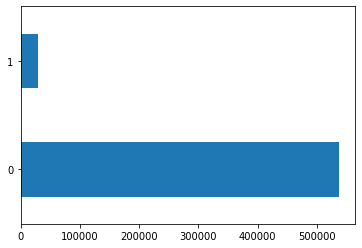

In [58]:
y_train.value_counts().plot(kind='barh')

### The data is not balanced. 
### I will try to balance it with combination of under and over sampling
### According to this site undersampling and than SMOTE is very popular
### https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/


In [59]:
undersampler = RandomUnderSampler(sampling_strategy=0.2)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

In [60]:
y_undersampled.value_counts()

0    149465
1     29893
Name: click, dtype: int64

<AxesSubplot:>

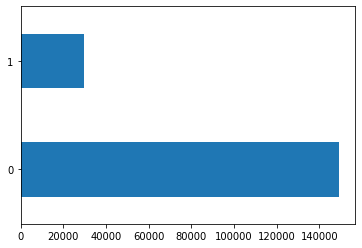

In [61]:
y_undersampled.value_counts().plot(kind='barh')

In [62]:
oversampler = SMOTE()
oversampler = RandomOverSampler(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

In [63]:
y_oversampled.value_counts()

0    538176
1    538176
Name: click, dtype: int64

<AxesSubplot:>

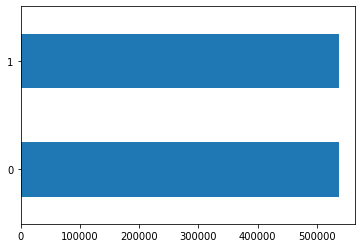

In [64]:
y_oversampled.value_counts().plot(kind='barh')

### Feature Selection:

### Pearson  Correlation

In [65]:
PEARSON_MAX_FEATURES = 70

def correlation_selector(X, y, features_num):
    correlations = []
    feature_names = X.columns

    for i in feature_names:
        correlation = np.corrcoef(X[i], y)[0, 1]
        correlations.append(correlation)
    
    # replace NaN with 0
    correlations = [0 if np.isnan(correlation) else correlation for correlation in correlations]
    feature_correlations = list(zip(feature_names, correlations))
    feature_correlations = sorted(feature_correlations, key=lambda x: np.abs(x[1]), reverse=True)
    return feature_correlations[:PEARSON_MAX_FEATURES]
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

results = correlation_selector(X_oversampled, y_oversampled,PEARSON_MAX_FEATURES)
for r in results:
    print(f'{r[0]: <30} {r[1]:.3f}')

/opt/tljh/user/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/tljh/user/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


developer_id_7125885284350687141 -0.199
developer_id_6054197513203380012 0.160
installs_10,000,000+           -0.149
installs_50,000,000+           0.142
iap                            0.136
editors_choice                 0.115
device_osv_8.0.0               -0.085
developer_id_8000319753740505601 -0.078
installs_100,000,000+          -0.062
developer_id_5739892051681567719 0.059
installs_1,000+                -0.058
developer_id_6677g.com         0.047
user_isp_T-Mobile USA          0.046
installs_5,000,000+            0.043
developer_id_7630417586978766880 -0.043
installs_100,000+              0.043
device_area                    -0.042
developer_id_5614380929317640208 0.040
device_osv_7.0                 0.038
developer_id_Sweet+Nitro+Publishing 0.038
developer_id_blastmatchgames   0.037
user_isp_Digital Ocean         -0.036
user_isp_rare_user_isp         -0.036
developer_id_6615809648420562690 0.033
device_osv_7.1.2               0.033
installs_1,000,000,000+        0.032
developer

In [66]:
pearson_features =  [i[0] for i in results]

In [67]:
pearson_features

['developer_id_7125885284350687141',
 'developer_id_6054197513203380012',
 'installs_10,000,000+',
 'installs_50,000,000+',
 'iap',
 'editors_choice',
 'device_osv_8.0.0',
 'developer_id_8000319753740505601',
 'installs_100,000,000+',
 'developer_id_5739892051681567719',
 'installs_1,000+',
 'developer_id_6677g.com',
 'user_isp_T-Mobile USA',
 'installs_5,000,000+',
 'developer_id_7630417586978766880',
 'installs_100,000+',
 'device_area',
 'developer_id_5614380929317640208',
 'device_osv_7.0',
 'developer_id_Sweet+Nitro+Publishing',
 'developer_id_blastmatchgames',
 'user_isp_Digital Ocean',
 'user_isp_rare_user_isp',
 'developer_id_6615809648420562690',
 'device_osv_7.1.2',
 'installs_1,000,000,000+',
 'developer_id_5062298237373103345',
 'entertainment',
 'developer_id_Banana+%26+Co.',
 'developer_id_Renown+Entertainment',
 'mature',
 'device_osv_6.0',
 'score',
 'game',
 'education',
 'reviews',
 'developer_id_5095490389686529219',
 'developer_id_good+indie+apps',
 'developer_id_90

### CHI Feature selection 

In [68]:
CHI_MAX_FEATURES = 70

In [69]:
chi_selector = SelectKBest(chi2, k=CHI_MAX_FEATURES)
chi_selector.fit(X_oversampled, y_oversampled)
chi_support = chi_selector.get_support()

feature_scores = list(zip(X_oversampled.columns, chi_selector.scores_))
feature_scores = sorted(feature_scores, key=lambda x: np.abs(x[1]), reverse=True)[:CHI_MAX_FEATURES]
for r in feature_scores:
    print(f'{r[0]: <30} {r[1]:.3f}')

developer_id_7125885284350687141 36909.221
installs_10,000,000+           18818.550
installs_50,000,000+           18602.449
editors_choice                 10438.535
iap                            5944.287
installs_100,000,000+          4033.525
installs_100,000+              1852.923
installs_5,000,000+            1827.385
entertainment                  1076.223
mature                         938.204
education                      837.664
reviews                        609.523
installs_10,000+               585.469
shopping                       264.298
user_state_IA                  205.383
device_area                    200.274
installs_500,000+              169.188
user_state_AK                  155.161
user_state_OR                  93.061
user_state_OH                  86.211
user_state_NH                  77.595
user_state_FL                  76.497
user_state_NM                  74.796
everyone                       74.309
user_state_WI                  73.572
user_state_ME    

In [70]:
chi_features =  [i[0] for i in feature_scores]


### Find features selected in both lists

In [71]:
features = list(set(pearson_features).intersection(chi_features)) # These are the features in both features selection algo
#features = list(set(pearson_features + chi_features)) # # These are the features in any of the features selection algo
features

['shopping',
 'reviews',
 'installs_5,000,000+',
 'installs_50,000,000+',
 'mature',
 'developer_id_7125885284350687141',
 'game',
 'device_area',
 'installs_100,000,000+',
 'education',
 'iap',
 'user_state_AK',
 'editors_choice',
 'user_state_IA',
 'installs_500,000+',
 'installs_10,000,000+',
 'user_state_OR',
 'entertainment',
 'installs_100,000+',
 'installs_10,000+',
 'everyone',
 'bids',
 'score']

### Take the final list of features

In [72]:
X_train_final = X_oversampled[features]
X_test_final = X_test[features]

### Function for printing results

In [73]:
def print_res(y_pred):
    y_pred_bool = y_pred > 0.5
    print(classification_report(y_test, y_pred_bool))
    cm = confusion_matrix(y_test, y_pred_bool)
    print(cm)

### KNN - Failed to make it work. The data is too large

In [74]:
#k=1
#knn = KNeighborsClassifier(n_neighbors=k)
#knn.fit(X_train_final, y_oversampled)
#y_pred = knn.predict(X_test_final)
#print_res(y_pred)

### Decision Tree - Brings ok results

In [75]:
dtc = DecisionTreeClassifier(max_depth=8,criterion='entropy', max_features='sqrt')
dtc.fit(X_train_final, y_oversampled)
y_pred = dtc.predict(X_test_final)
print_res(y_pred)

              precision    recall  f1-score   support

           0       0.95      0.28      0.43   2111231
           1       0.08      0.81      0.14    161045

    accuracy                           0.32   2272276
   macro avg       0.51      0.54      0.29   2272276
weighted avg       0.89      0.32      0.41   2272276

[[ 594396 1516835]
 [  31043  130002]]


In [76]:
model_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': range(3, 8, 1),  
    'max_features' : ['auto', 'sqrt', 'log2', len(features)]
}
clf = GridSearchCV(dtc, model_params, cv=2, verbose=3)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(X_train_final, y_oversampled)

# print winning set of hyperparameters
pprint(model.best_estimator_.get_params())

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV 1/2] END criterion=gini, max_depth=3, max_features=auto;, score=0.533 total time=   0.5s
[CV 2/2] END criterion=gini, max_depth=3, max_features=auto;, score=0.555 total time=   0.5s
[CV 1/2] END criterion=gini, max_depth=3, max_features=sqrt;, score=0.481 total time=   0.5s
[CV 2/2] END criterion=gini, max_depth=3, max_features=sqrt;, score=0.444 total time=   0.5s
[CV 1/2] END criterion=gini, max_depth=3, max_features=log2;, score=0.511 total time=   0.5s
[CV 2/2] END criterion=gini, max_depth=3, max_features=log2;, score=0.481 total time=   0.5s
[CV 1/2] END criterion=gini, max_depth=3, max_features=23;, score=0.496 total time=   0.9s
[CV 2/2] END criterion=gini, max_depth=3, max_features=23;, score=0.497 total time=   0.9s
[CV 1/2] END criterion=gini, max_depth=4, max_features=auto;, score=0.545 total time=   0.5s
[CV 2/2] END criterion=gini, max_depth=4, max_features=auto;, score=0.491 total time=   0.5s
[CV 1/2] END 

### Logistic Regression - bad results 

In [77]:
lr = LogisticRegression(max_iter = 1000, C=0.5)
lr.fit(X_train_final, y_oversampled)
y_pred = lr.predict(X_test_final)
print_res(y_pred)

              precision    recall  f1-score   support

           0       0.94      0.44      0.60   2111231
           1       0.08      0.62      0.14    161045

    accuracy                           0.46   2272276
   macro avg       0.51      0.53      0.37   2272276
weighted avg       0.88      0.46      0.57   2272276

[[ 937452 1173779]
 [  60884  100161]]


In [78]:
model_params = {
    'penalty' : ['l1', 'l2', 'elasticnet',],
    'C': [0.5,1]
}

clf = GridSearchCV(lr, model_params, cv=2, verbose=3)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(X_train_final, y_oversampled)

# print winning set of hyperparameters
pprint(model.best_estimator_.get_params())

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ...................C=0.5, penalty=l1;, score=nan total time=   0.2s
[CV 2/2] END ...................C=0.5, penalty=l1;, score=nan total time=   0.2s
[CV 1/2] END .................C=0.5, penalty=l2;, score=0.552 total time=   9.8s
[CV 2/2] END .................C=0.5, penalty=l2;, score=0.519 total time=  11.6s
[CV 1/2] END ...........C=0.5, penalty=elasticnet;, score=nan total time=   0.2s
[CV 2/2] END ...........C=0.5, penalty=elasticnet;, score=nan total time=   0.1s
[CV 1/2] END .....................C=1, penalty=l1;, score=nan total time=   0.1s
[CV 2/2] END .....................C=1, penalty=l1;, score=nan total time=   0.1s
[CV 1/2] END ...................C=1, penalty=l2;, score=0.551 total time=  10.4s
[CV 2/2] END ...................C=1, penalty=l2;, score=0.519 total time=  11.9s
[CV 1/2] END .............C=1, penalty=elasticnet;, score=nan total time=   0.1s
[CV 2/2] END .............C=1, penalty=elasticnet

/opt/tljh/user/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

{'C': 0.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### SVM - Took too long

In [79]:
#svm = SVC()
#svm.fit(X_train_final, y_oversampled)
#y_pred = svm.predict(X_test_final)
#print_res(y_pred)

### Random Forest - Bring good results

In [80]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=30,criterion='entropy')
rf.fit(X_train_final, y_oversampled)
y_pred = rf.predict(X_test_final)
print_res(y_pred)

              precision    recall  f1-score   support

           0       0.95      0.21      0.35   2111231
           1       0.08      0.85      0.14    161045

    accuracy                           0.26   2272276
   macro avg       0.51      0.53      0.24   2272276
weighted avg       0.89      0.26      0.33   2272276

[[ 447682 1663549]
 [  23677  137368]]


In [81]:
model_params = {
    'criterion' : ['gini','entropy'],
    'n_estimators': [10,20,30],
    'max_depth' : range(5,6,1),    
    'min_samples_split': range(10,20,10)
}
clf = GridSearchCV(rf, model_params, cv=2, verbose=3)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(X_train_final, y_oversampled)

# print winning set of hyperparameters
pprint(model.best_estimator_.get_params())

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END criterion=gini, max_depth=5, min_samples_split=10, n_estimators=10;, score=0.487 total time=   3.3s
[CV 2/2] END criterion=gini, max_depth=5, min_samples_split=10, n_estimators=10;, score=0.497 total time=   3.2s
[CV 1/2] END criterion=gini, max_depth=5, min_samples_split=10, n_estimators=20;, score=0.488 total time=   6.1s
[CV 2/2] END criterion=gini, max_depth=5, min_samples_split=10, n_estimators=20;, score=0.500 total time=   6.1s
[CV 1/2] END criterion=gini, max_depth=5, min_samples_split=10, n_estimators=30;, score=0.484 total time=   9.4s
[CV 2/2] END criterion=gini, max_depth=5, min_samples_split=10, n_estimators=30;, score=0.499 total time=   8.8s
[CV 1/2] END criterion=entropy, max_depth=5, min_samples_split=10, n_estimators=10;, score=0.486 total time=   3.4s
[CV 2/2] END criterion=entropy, max_depth=5, min_samples_split=10, n_estimators=10;, score=0.504 total time=   3.1s
[CV 1/2] END criterion=entropy

### Gradient Boosting - Best results

In [82]:
gbc = GradientBoostingClassifier(learning_rate=0.1, loss='deviance', n_estimators=10)
gbc.fit(X_train_final, y_oversampled)
y_pred = gbc.predict(X_test_final)
print_res(y_pred)   

              precision    recall  f1-score   support

           0       0.96      0.10      0.17   2111231
           1       0.07      0.95      0.14    161045

    accuracy                           0.16   2272276
   macro avg       0.52      0.52      0.16   2272276
weighted avg       0.90      0.16      0.17   2272276

[[ 202563 1908668]
 [   7561  153484]]


In [83]:
for lr in [0.1,1]:
    for loss_val in  ['deviance']:
        for n_estimat in [10]:        
            for min_leafs in  [5,50]:
                print(f'Train ({lr}):{loss_val}:{n_estimat}:{min_leafs}')
                gbc = GradientBoostingClassifier(learning_rate=lr, loss=loss_val, n_estimators=n_estimat, min_samples_leaf=min_leafs)
                gbc.fit(X_train_final, y_oversampled)
                y_pred = gbc.predict(X_test_final)
                print_res(y_pred)

Train (0.1):deviance:10:5
              precision    recall  f1-score   support

           0       0.96      0.10      0.17   2111231
           1       0.07      0.95      0.14    161045

    accuracy                           0.16   2272276
   macro avg       0.52      0.52      0.16   2272276
weighted avg       0.90      0.16      0.17   2272276

[[ 202563 1908668]
 [   7561  153484]]
Train (0.1):deviance:10:50
              precision    recall  f1-score   support

           0       0.96      0.10      0.17   2111231
           1       0.07      0.95      0.14    161045

    accuracy                           0.16   2272276
   macro avg       0.52      0.52      0.16   2272276
weighted avg       0.90      0.16      0.17   2272276

[[ 202563 1908668]
 [   7561  153484]]
Train (1):deviance:10:5
              precision    recall  f1-score   support

           0       0.95      0.38      0.55   2111231
           1       0.08      0.75      0.15    161045

    accuracy               